In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
style.use("fivethirtyeight")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_circles

In [2]:
dataset=make_circles()
data=dataset[0]
target=dataset[1]

In [3]:
circles=pd.DataFrame(data,columns=["x1","x2"])
circles["target"]=target

In [4]:
circles.head()

,x1,x2,target
0,0.340623,0.723862,1
1,-0.637424,0.770513,0
2,0.793692,-0.100267,1
3,0.428661,0.675462,1
4,-0.876307,-0.481754,0


In [5]:
circles.corr()

,x1,x2,target
x1,1.000000e+00,4.061792e-18,1.213714e-17
x2,4.061792e-18,1.000000e+00,-1.473796e-17
target,1.213714e-17,-1.473796e-17,1.000000e+00


In [6]:
circles.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,100.0,2.997602e-17,0.643538,-1.000000,-0.637424,3.816392e-17,0.637424,1.000000
x2,100.0,1.276756e-17,0.643538,-0.998027,-0.616411,-1.286498e-16,0.616411,0.998027
target,100.0,5.000000e-01,0.502519,0.000000,0.000000,5.000000e-01,1.000000,1.000000


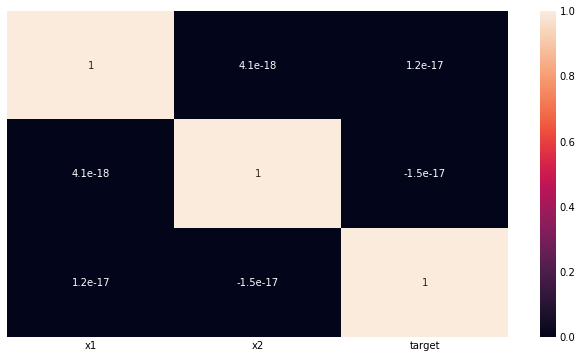

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(circles.corr(),yticklabels=False,annot=True)

<Figure size 720x432 with 0 Axes>

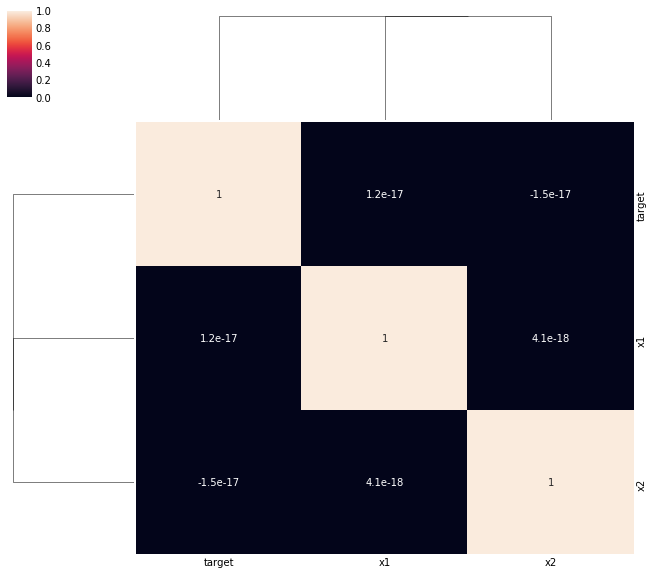

In [8]:
plt.figure(figsize=(10,6))
sns.clustermap(circles.corr(),annot=True)

<Figure size 720x432 with 0 Axes>

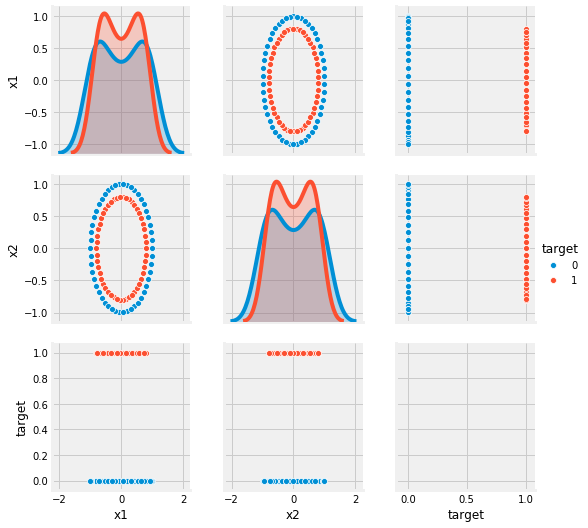

In [9]:
plt.figure(figsize=(10,6))
sns.pairplot(circles,hue="target")

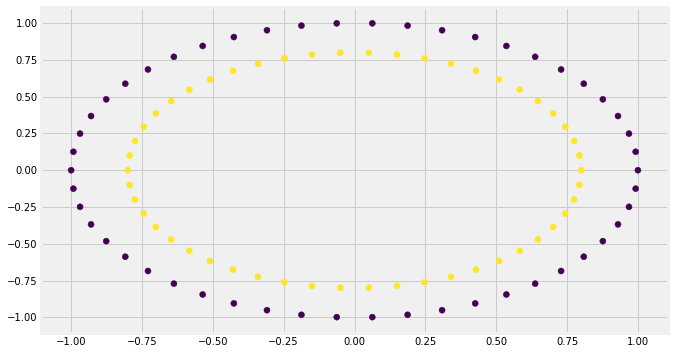

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(circles["x1"],circles["x2"],c=circles["target"])

In [11]:
x=np.array(circles.drop(["target"],axis=1))
y=np.array(circles["target"])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)

In [14]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100,
                           algorithm="SAMME.R",learning_rate=0.5)

In [15]:
adaboost.fit(x_train,y_train)
y_pred=adaboost.predict(x_test)

In [16]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[14  2]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.82      1.00      0.90         9

    accuracy                           0.92        25
   macro avg       0.91      0.94      0.92        25
weighted avg       0.93      0.92      0.92        25

0.92


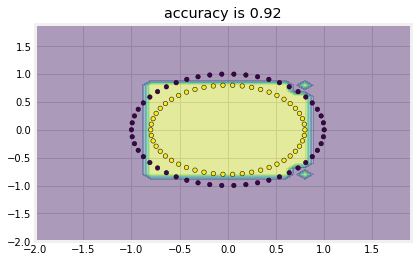

In [17]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100,
                           algorithm="SAMME.R",learning_rate=0.5)
adaboost.fit(x_train,y_train)
y_pred=adaboost.predict(x_test)
acc=accuracy_score(y_test,y_pred)
x_min,x_max=x_train[:,0].min()-1,x_train[:,0].max()+1
y_min,y_max =x_train[:,1].min()-1,x_train[:, 1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),
                     np.arange(x_min,x_max,0.1))
z=adaboost.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha=0.4)
plt.scatter(x[:,0],x[:,1],c=y,s=20,edgecolor='k')
plt.title(f"accuracy is {round(acc,4)}")
plt.show()

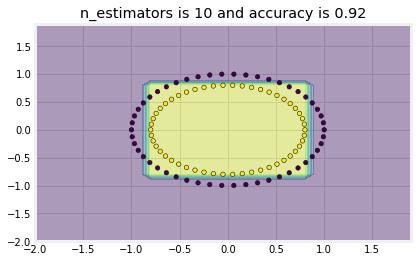

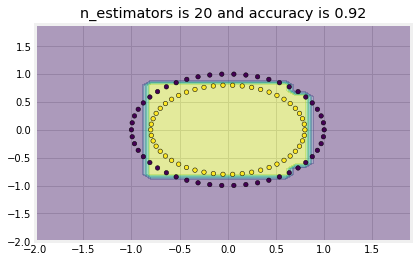

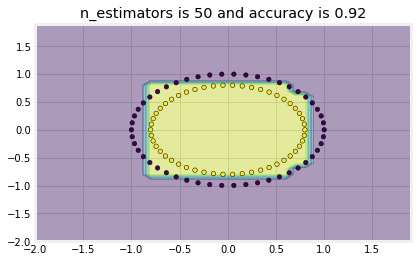

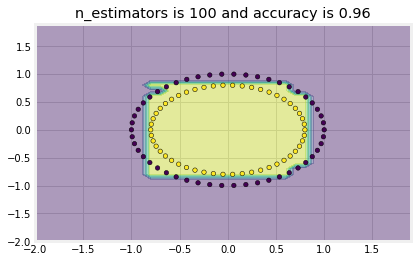

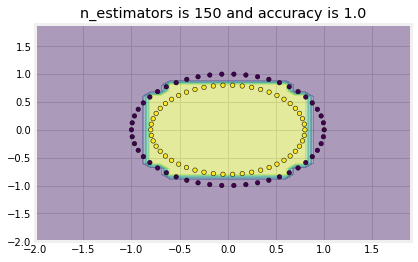

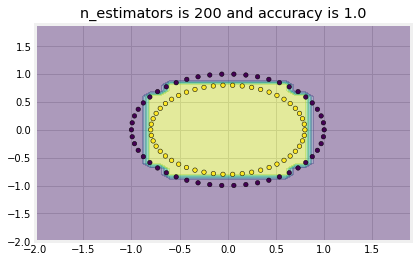

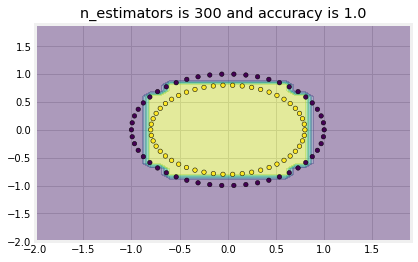

In [18]:
#lets check varius n esitmator
n_estimators=[10,20,50,100,150,200,300]
for i in n_estimators:
    adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=i,
                           algorithm="SAMME.R",learning_rate=0.5)
    adaboost.fit(x_train,y_train)
    y_pred=adaboost.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    x_min,x_max=x_train[:,0].min()-1,x_train[:,0].max()+1
    y_min,y_max =x_train[:,1].min()-1,x_train[:, 1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),
                         np.arange(x_min,x_max,0.1))
    z=adaboost.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,alpha=0.4)
    plt.scatter(x[:,0],x[:,1],c=y,s=20,edgecolor='k')
    plt.title(f"n_estimators is {i} and accuracy is {round(acc,4)}")
    plt.show()
    

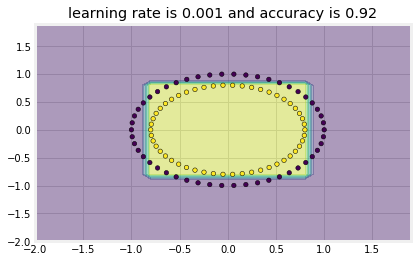

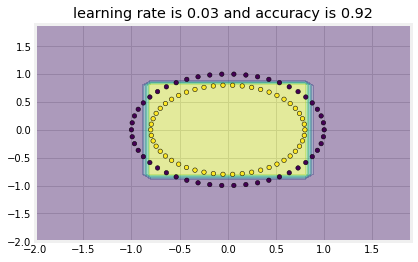

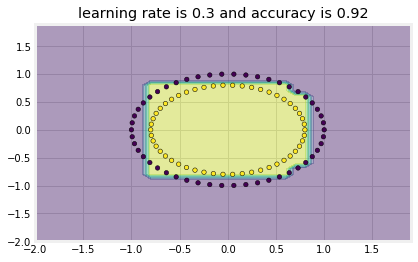

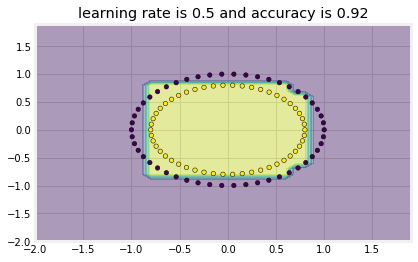

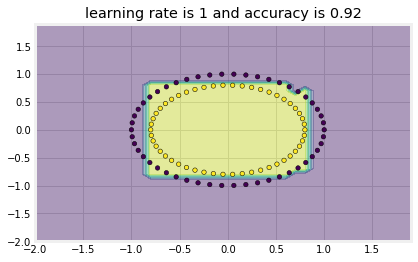

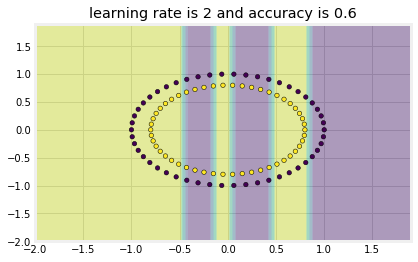

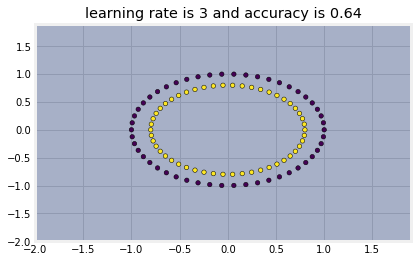

In [19]:
#lets check varius learning rates
learningrate=[0.001,0.03,0.3,0.5,1,2,3]
for i in learningrate:
    adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100,
                           algorithm="SAMME.R",learning_rate=i)
    adaboost.fit(x_train,y_train)
    y_pred=adaboost.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    x_min,x_max=x_train[:,0].min()-1,x_train[:,0].max()+1
    y_min,y_max =x_train[:,1].min()-1,x_train[:, 1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),
                         np.arange(x_min,x_max,0.1))
    z=adaboost.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,alpha=0.4)
    plt.scatter(x[:,0],x[:,1],c=y,s=20,edgecolor='k')
    plt.title(f"learning rate is {i} and accuracy is {round(acc,4)}")
    plt.show()
    